Research Question: Can a winner of a fight be predicted based on the types of attacks made?

In [1]:
import sys
import seaborn as sns
import scipy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import ensemble
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
#from mpl_toolkits.mplot3d import Axes3D
from sklearn import tree
import graphviz
import pydotplus
from IPython.display import Image
from sklearn import ensemble
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn import neighbors
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.metrics import roc_curve, roc_auc_score

from sklearn.metrics import roc_curve, roc_auc_score

import os

There are two corners that fighters can be in: Red or Blue. The types of attacks performed by each fighter were categorized by these two corners. I created a dummy feature to find out when the Red corner won. I deleted all other features and would bring them back to test out which values created the best results. I ultimately decided on including all of the different attack types for the Red corner because this was what I was most interested in exploring.

In [2]:
os.getcwd()
os.chdir('C:/Users/mattb/Desktop/Sample Code/Thinkful/')
df = pd.read_csv('data.csv')

df.columns = df.columns.str.replace(' ', '')
df['Winner'] = df['Winner'].map({'Red': 1, 'Blue': 0, 'Draw': None})

df.dropna(axis=0, how='any', thresh=None, subset=None, inplace=True)
 
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

del df['R_fighter']
del df['B_fighter']
del df['Referee']
del df['date']
del df['location']
del df['title_bout']
del df['no_of_rounds']
del df['R_draw']
del df['B_draw']
del df['R_wins']
del df['B_wins']
del df['R_losses']
del df['B_losses']
del df['B_current_lose_streak']
del df['R_current_lose_streak']
del df['B_longest_win_streak']
del df['R_longest_win_streak']
del df['B_age']
del df['R_age']
del df['B_total_title_bouts']
del df['R_total_title_bouts']
del df['B_avg_SIG_STR_pct']
del df['R_avg_SIG_STR_pct']
del df['B_avg_opp_SIG_STR_pct']
del df['R_avg_opp_SIG_STR_pct']
del df['B_avg_SUB_ATT']
del df['R_avg_SUB_ATT']
del df['B_avg_opp_SUB_ATT']
del df['R_avg_opp_SUB_ATT']
del df['B_avg_KD']
del df['R_avg_KD']
del df['B_avg_PASS']
del df['R_avg_PASS']
del df['B_avg_REV']
del df['R_avg_REV']
del df['B_avg_opp_KD']
del df['R_avg_opp_KD']
del df['B_avg_opp_PASS']
del df['R_avg_opp_PASS']
del df['B_avg_opp_REV']
del df['R_avg_opp_REV']
del df['B_current_win_streak']
del df['R_current_win_streak']
del df['B_avg_BODY_att']
del df['R_avg_BODY_att']
del df['B_avg_CLINCH_att']
del df['R_avg_CLINCH_att']
del df['B_avg_DISTANCE_att']
del df['R_avg_DISTANCE_att']
del df['B_avg_GROUND_att']
del df['R_avg_GROUND_att']
del df['B_avg_HEAD_att']
del df['R_avg_HEAD_att']
del df['B_avg_LEG_att']
del df['R_avg_LEG_att']
del df['B_avg_SIG_STR_att']
del df['R_avg_SIG_STR_att']
del df['B_avg_TD_att']
del df['R_avg_TD_att']
del df['B_avg_TD_pct']
del df['R_avg_TD_pct']
del df['B_avg_TOTAL_STR_att']
del df['R_avg_TOTAL_STR_att']
del df['B_avg_opp_BODY_att']
del df['R_avg_opp_BODY_att']
del df['B_avg_opp_CLINCH_att']
del df['R_avg_opp_CLINCH_att']
del df['B_avg_opp_DISTANCE_att']
del df['R_avg_opp_DISTANCE_att']
del df['B_avg_opp_GROUND_att']
del df['R_avg_opp_GROUND_att']
del df['B_avg_opp_HEAD_att']
del df['R_avg_opp_HEAD_att']
del df['B_avg_opp_LEG_att']
del df['R_avg_opp_LEG_att']
del df['B_avg_opp_SIG_STR_att']
del df['R_avg_opp_SIG_STR_att']
del df['B_avg_opp_TD_att']
del df['R_avg_opp_TD_att']
del df['B_avg_opp_TD_pct']
del df['R_avg_opp_TD_pct']
del df['B_avg_opp_TOTAL_STR_att']
del df['R_avg_opp_TOTAL_STR_att']
del df['B_total_rounds_fought']
del df['R_total_rounds_fought']
del df['B_Weight_lbs']
del df['R_Weight_lbs']
del df['B_Height_cms']
del df['R_Height_cms']
del df['B_Reach_cms']
del df['R_Reach_cms']
del df['B_win_by_Submission']
del df['R_win_by_Submission']
del df['B_win_by_Decision_Split']
del df['R_win_by_Decision_Split']
del df['B_win_by_Decision_Majority']
del df['R_win_by_Decision_Majority']
del df['B_win_by_Decision_Unanimous']
del df['R_win_by_Decision_Unanimous']
del df['B_win_by_KO/TKO']
del df['R_win_by_KO/TKO']
del df['B_win_by_TKO_Doctor_Stoppage']
del df['R_win_by_TKO_Doctor_Stoppage']
del df['B_total_time_fought(seconds)']
del df['R_total_time_fought(seconds)']

del df['B_avg_BODY_landed']
del df['B_avg_CLINCH_landed']
del df['B_avg_DISTANCE_landed']
del df['B_avg_GROUND_landed']
del df['B_avg_HEAD_landed']
del df['B_avg_LEG_landed']
del df['B_avg_SIG_STR_landed']
del df['B_avg_TD_landed']
del df['B_avg_TOTAL_STR_landed']
del df['B_avg_opp_BODY_landed']
del df['B_avg_opp_CLINCH_landed']
del df['B_avg_opp_DISTANCE_landed']
del df['B_avg_opp_GROUND_landed']
del df['B_avg_opp_HEAD_landed']
del df['B_avg_opp_LEG_landed']
del df['B_avg_opp_SIG_STR_landed']
del df['B_avg_opp_TD_landed']
del df['B_avg_opp_TOTAL_STR_landed']

#del df['R_avg_BODY_landed']
#del df['R_avg_CLINCH_landed']
#del df['R_avg_DISTANCE_landed']
#del df['R_avg_GROUND_landed']
#del df['R_avg_HEAD_landed']
#del df['R_avg_LEG_landed']
#del df['R_avg_SIG_STR_landed']
#del df['R_avg_TD_landed']
del df['R_avg_TOTAL_STR_landed']
del df['R_avg_opp_BODY_landed']
del df['R_avg_opp_CLINCH_landed']
del df['R_avg_opp_DISTANCE_landed']
del df['R_avg_opp_GROUND_landed']
del df['R_avg_opp_HEAD_landed']
del df['R_avg_opp_LEG_landed']
del df['R_avg_opp_SIG_STR_landed']
del df['R_avg_opp_TD_landed']
del df['R_avg_opp_TOTAL_STR_landed']

for i in df:
    if df[i].dtype == object:
        del df[i]
print(df.columns)
for i in df:
    if i != 'Winner':
        df.sort_values(i)

features = []
for i in df.columns:
    if i != 'Winner':
        features.append(i)

Index(['Winner', 'R_avg_BODY_landed', 'R_avg_CLINCH_landed',
       'R_avg_DISTANCE_landed', 'R_avg_GROUND_landed', 'R_avg_HEAD_landed',
       'R_avg_LEG_landed', 'R_avg_SIG_STR_landed', 'R_avg_TD_landed'],
      dtype='object')


After determining which features I was most interested in, I decided to explore how these features correlated to each other. The strongest correlation, R_avg_SIG_STR_landed and R_avg_HEAD_landed, occurs because SIG_STR, or significant strike, includes strikes to the head.

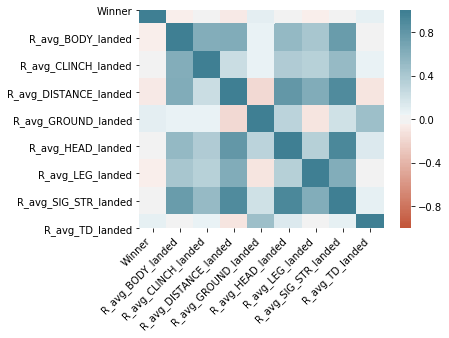

In [3]:
ax = sns.heatmap(
    df.corr(), 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

There was an issue with preparing the data where when the two final datasets were assigned to X and Y, it appeared as if Y became longer by 2 values. Because of this I deleted those final two rows.

In [4]:
X = df.drop(df['Winner'])
Y = df['Winner']
Y = Y.drop(3151)
Y = Y.drop(3150)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 465)


Regressive models did not perform well with this dataset, as is evident in the performance of the K Nearest Neighbor Regressor, and the Decision Tree Regressor. This might be due to the fact that these values were categorical instead of continuous.

In [5]:
knn = KNeighborsRegressor(n_neighbors=10)
Y2 = Y.to_numpy()
knn.fit(X, Y)
score = cross_val_score(knn, X, Y, cv=10)
print(score)
print("Unweighted Accuracy: %0.2f (+/- %0.2f)" % (score.mean(), score.std() * 2))


[-0.08113653 -0.03400884 -0.11963487 -0.1770196  -0.14378066 -0.14783827
 -0.20042391 -0.08811111 -0.29583333  0.        ]
Unweighted Accuracy: -0.13 (+/- 0.16)


In [6]:
decision_tree = tree.DecisionTreeRegressor(max_depth=2)
decision_tree.fit(X,Y)
score = cross_val_score(decision_tree, X, Y, cv=5)
print(score)
print("Unweighted Accuracy: %0.2f (+/- %0.2f)" % (score.mean(), score.std() * 2))
    

[-0.08299688 -0.17167388 -0.11482907  0.15729779 -0.52207393]
Unweighted Accuracy: -0.15 (+/- 0.44)


KNN Classifier performed significantly better than the Regressor. The performance is still significantly lacking. The model barely performs better than a coin flip. While on other datasets, this could be associated with overfitting, I tried multiple combinations of values and achieved similar results (more on the results later).

In [7]:
neighbors = KNeighborsClassifier(n_neighbors=5)
neighbors.fit(X,Y)
score = cross_val_score(neighbors, X, Y, cv=10)
print(score)
print("Unweighted Accuracy: %0.2f (+/- %0.2f)" % (score.mean(), score.std() * 2))


[0.54746835 0.56012658 0.57911392 0.54746835 0.52380952 0.5
 0.58917197 0.60828025 0.60191083 0.61146497]
Unweighted Accuracy: 0.57 (+/- 0.07)


The Random Forest Classifier and Decision Tree Classifiers did the best out of any models. This is due to the Decision Tree's strength handling categorical variables and a limited number of features

In [8]:
rfc = ensemble.RandomForestClassifier()
rfc.fit(X,Y)
print(cross_val_score(rfc, X, Y, cv=10))

C:\Users\mattb\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[0.51582278 0.50316456 0.52531646 0.50632911 0.47301587 0.50636943
 0.61783439 0.6910828  0.79936306 0.74203822]


[0.58860759 0.60443038 0.63291139 0.59493671 0.63492063 0.63694268
 0.66878981 0.64012739 0.76433121 0.72292994]


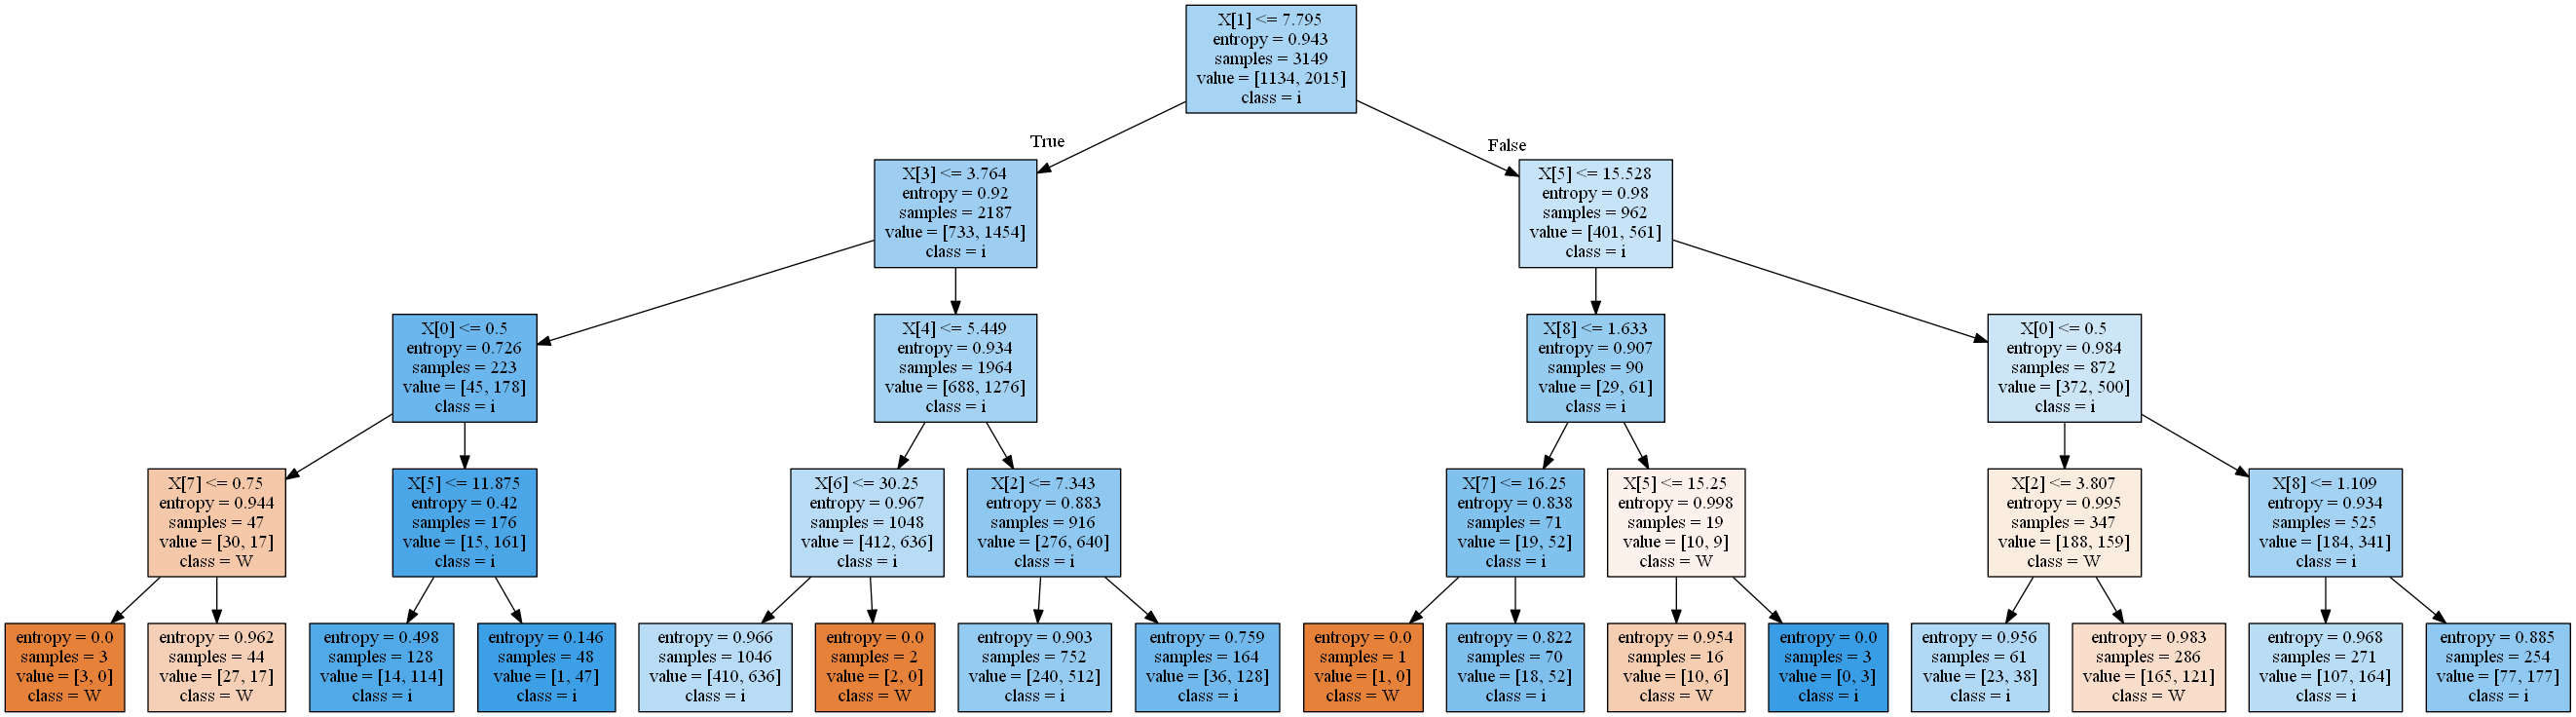

In [9]:
decision_tree = tree.DecisionTreeClassifier(
    criterion='entropy',
    max_features=1,
    max_depth=4,
    random_state = 500
)

decision_tree.fit(X,Y)
print(cross_val_score(decision_tree, X, Y, cv=10))

dot_data = tree.export_graphviz(
    decision_tree, out_file=None,
    #feature_names= features,
    class_names='Winner',
    filled=True
)
graph = pydotplus.graph_from_dot_data(dot_data)
graph.create_png()
Image(graph.create_png())

Here I've plotted AUC-ROC curves for my Classifiers. I'm interested in seeing, side by side, how these models perform in determining true positives.

C:\Users\mattb\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


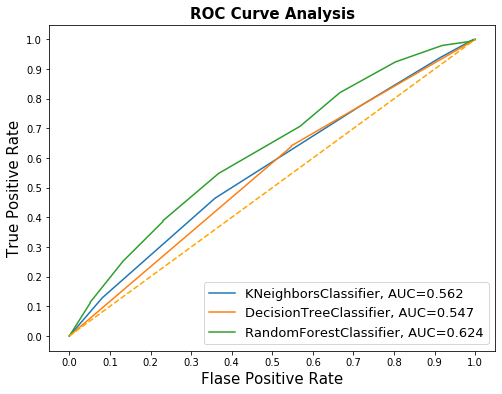

In [10]:
# Instantiate the classfiers and make a list
classifiers = [KNeighborsClassifier(), 
               DecisionTreeClassifier(random_state=1234),
               RandomForestClassifier(random_state=1234)]

# Define a result table as a DataFrame
result_table = pd.DataFrame(columns=['classifiers', 'fpr','tpr','auc'])

# Train the models and record the results
for cls in classifiers:
    model = cls.fit(X_train, y_train)
    yproba = model.predict_proba(X_test)[::,1]
    
    fpr, tpr, _ = roc_curve(y_test,  yproba)
    auc = roc_auc_score(y_test, yproba)
    
    result_table = result_table.append({'classifiers':cls.__class__.__name__,
                                        'fpr':fpr, 
                                        'tpr':tpr, 
                                        'auc':auc}, ignore_index=True)

# Set name of the classifiers as index labels
result_table.set_index('classifiers', inplace=True)

fig = plt.figure(figsize=(8,6))

for i in result_table.index:
    plt.plot(result_table.loc[i]['fpr'], 
             result_table.loc[i]['tpr'], 
             label="{}, AUC={:.3f}".format(i, result_table.loc[i]['auc']))
    
plt.plot([0,1], [0,1], color='orange', linestyle='--')

plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("Flase Positive Rate", fontsize=15)

plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("True Positive Rate", fontsize=15)

plt.title('ROC Curve Analysis', fontweight='bold', fontsize=15)
plt.legend(prop={'size':13}, loc='lower right')

plt.show()

The SVM doesn't show significant improvements over the other models. We still have Decision trees to see if they are the best model.

In [ ]:
svm = SVC(kernel = 'linear')
svm.fit(X, Y)
score = cross_val_score(svm, X, Y, cv=5)
print(score)
print("Unweighted Accuracy: %0.2f (+/- %0.2f)" % (score.mean(), score.std() * 2))

Conclusion: I would use the Decision Tree Classifier as my predictive model for determining fight winners. Would I bet on this model? No.

About the data: Is it possible to use the type of hits by a specific corner to either explain other data or predict future outcomes? The short answer is no. What my data ignores are the individual fighters and what they bring to the table. Maybe one fighter has less hits, but hits harder. Because I didn't consider fighters, force, or timing, it is hard to make those predictions.